# Bike Shaing Case Study - Name: Nguyen Hoang Thang

## (I) Data prep

In [74]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

#load dataset and review the head with all rows
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [75]:
#review dataframe shape and statistics
print('shape:', df.shape)
df.describe()

shape: (730, 16)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [77]:
# mapping to decode the feature values
def int_to_day_str(weekday_int):
    days = ['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

    if 0 <= weekday_int <= 6:
        return str(weekday_int)+ '_'+ days[weekday_int]
    else:
        return weekday_int
def int_to_month_str(month_int):
        return f'{month_int:02d}'

# There are 7 categorical features ['yr','season','mnth','holiday','workingday','weekday','weathersit']    
df['yr'] = df['yr'].map({0:'2018',1:'2019'})
df['season']=df['season'].map({1:'1_spring', 2:'2_summer', 3:'3_fall', 4:'4_winter'})
df['holiday']=df['holiday'].map({0:'0_holiday',1:'1_holiday'})
df['workingday']=df['workingday'].map({0:'0_workingday',1:'1_workingday'})
df['weathersit']=df['weathersit'].map({1:'1_Clear',2:'2_Mist',3:'3_Light_Snow',4:'4_Heavy_Rain'})
df['weekday']=df['weekday'].map(int_to_day_str)
df['mnth']=df['mnth'].map(int_to_month_str)
df[['yr','season','mnth','holiday','workingday','weekday','weathersit']]

,yr,season,mnth,holiday,workingday,weekday,weathersit
0,2018,1_spring,01,0_holiday,0_workingday,6_Sat,2_Mist
1,2018,1_spring,01,0_holiday,0_workingday,0_Sun,2_Mist
2,2018,1_spring,01,0_holiday,1_workingday,1_Mon,1_Clear
3,2018,1_spring,01,0_holiday,1_workingday,2_Tue,1_Clear
4,2018,1_spring,01,0_holiday,1_workingday,3_Wed,1_Clear
...,...,...,...,...,...,...,...
725,2019,1_spring,12,0_holiday,1_workingday,4_Thu,2_Mist
726,2019,1_spring,12,0_holiday,1_workingday,5_Fri,2_Mist
727,2019,1_spring,12,0_holiday,0_workingday,6_Sat,2_Mist
728,2019,1_spring,12,0_holiday,0_workingday,0_Sun,1_Clear


## (II) initial EDA for univariate - the target 'cnt' 

<Axes: xlabel='holiday', ylabel='cnt'>

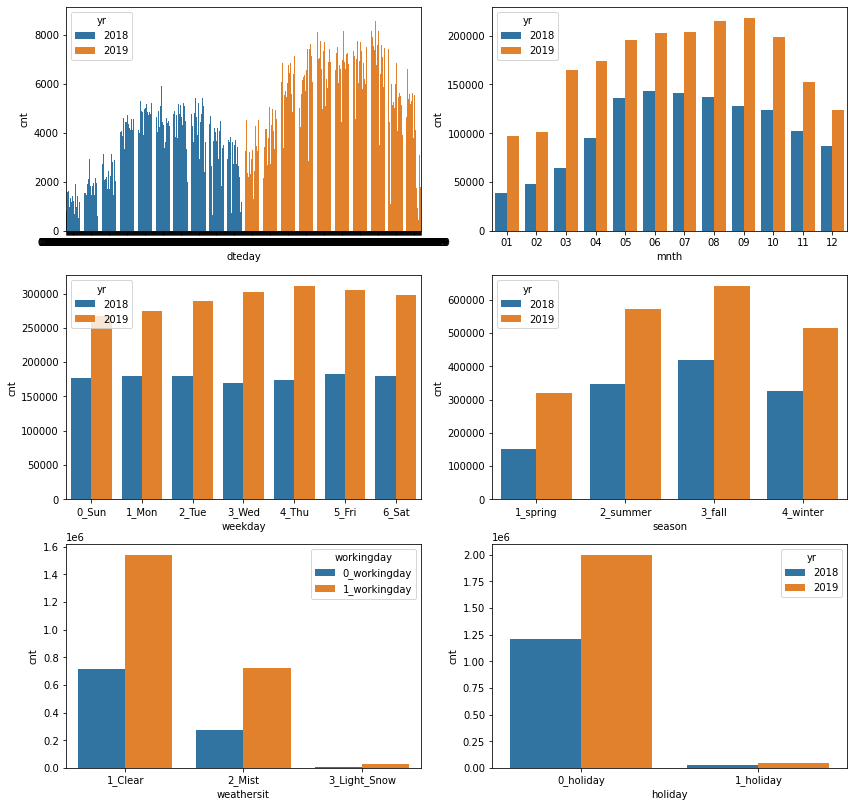

In [78]:
import seaborn as sb, matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
sb.barplot(data=df,y='cnt',x='dteday',hue='yr')
plt.subplot(3,2,2)
sb.barplot(data=df[['mnth','cnt','yr']].groupby(by=['mnth','yr']).agg({'cnt':'sum'}).reset_index(),y='cnt',x='mnth',hue='yr')
plt.subplot(3,2,3)
sb.barplot(data=df[['weekday','cnt','yr']].groupby(by=['weekday','yr']).agg({'cnt':'sum'}).reset_index(),y='cnt',x='weekday',hue='yr')
plt.subplot(3,2,4)
sb.barplot(data=df[['season','cnt','yr']].groupby(by=['season','yr']).agg({'cnt':'sum'}).reset_index(),y='cnt',x='season',hue='yr')
plt.subplot(3,2,5)
sb.barplot(data=df[['weathersit','cnt','workingday']].groupby(by=['weathersit','workingday']).agg({'cnt':'sum'}).reset_index(),y='cnt',x='weathersit',hue='workingday')
plt.subplot(3,2,6)
sb.barplot(data=df[['holiday','cnt','yr']].groupby(by=['holiday','yr']).agg({'cnt':'sum'}).reset_index(),y='cnt',x='holiday',hue='yr')

#### Summary on the target variable 'cnt' by categorical features:
- It has seasonal pattern by month and season, but not really by weekday
- It has a overall positive trend by date,month and year 
- It is mostly contributed during 'workingday', 'not_holiday' and good weathersit condition such as 'Clear' and 'Mist' cloudy (the better weather condition, the higher cnt)

<Axes: xlabel='holiday', ylabel='cnt'>

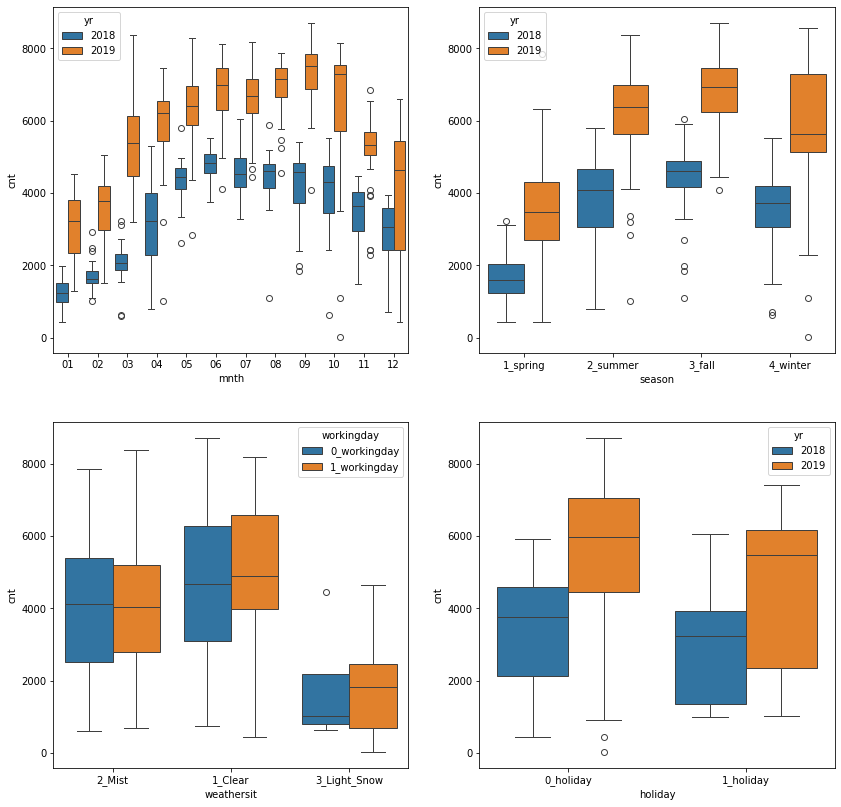

In [79]:
# import seaborn as sb, matplotlib.pyplot as plt
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
sb.boxplot(data=df,y='cnt',x='mnth',hue='yr')
plt.subplot(2,2,2)
sb.boxplot(data=df,y='cnt',x='season',hue='yr')
plt.subplot(2,2,3)
sb.boxplot(data=df,y='cnt',x='weathersit',hue='workingday')
plt.subplot(2,2,4)
sb.boxplot(data=df,y='cnt',x='holiday',hue='yr')

<Axes: xlabel='hum', ylabel='cnt'>

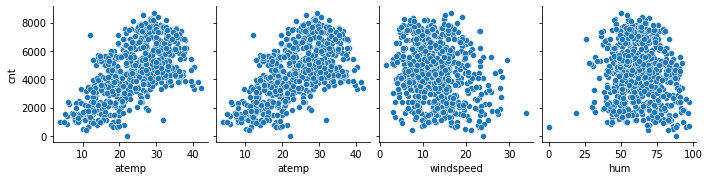

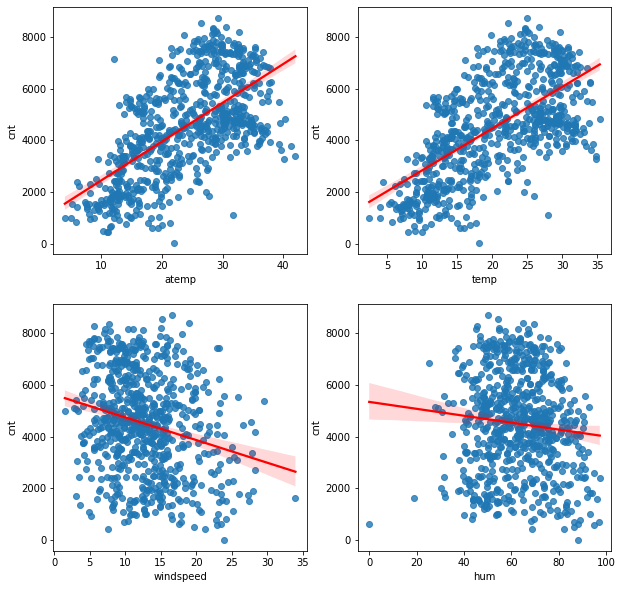

In [80]:
# there are 4 numerical features ['atemp','atemp','windspeed','hum'] those we need to evaluate their relationships with the target 'cnt'
sb.pairplot(data=df,x_vars=['atemp','atemp','windspeed','hum'],y_vars='cnt')
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sb.regplot(data=df,y='cnt',x='atemp',scatter=True,fit_reg=True,marker='o',line_kws={"color": "red"})
plt.subplot(2,2,2)
sb.regplot(data=df,y='cnt',x='temp',scatter=True,fit_reg=True,marker='o',line_kws={"color": "red"})
plt.subplot(2,2,3)
sb.regplot(data=df,y='cnt',x='windspeed',scatter=True,fit_reg=True,marker='o',line_kws={"color": "red"}) 
plt.subplot(2,2,4)
sb.regplot(data=df,y='cnt',x='hum',scatter=True,fit_reg=True,marker='o',line_kws={"color": "red"}) 


#### Summary on the target variable 'cnt' by numerical features:
- It has a overall positive trend or correlation by 'atemp' and 'temp' - temperature, but not really trendy by 'windspeed' and 'hum' (too scatted)

## (III) Features selection

In [81]:
#because cnt is total of 2 columns casual and registered, and also, instant and dteday are not useful for the model, we can drop those 4 col
df.drop(columns=['casual','registered','instant','dteday'],inplace=True)    
#review df info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [82]:
#get dummy features for all categorical columns, drop the 1st dummy column of each original categorical feature
df_dummies = pd.get_dummies(df[['yr','season','mnth','holiday','workingday','weekday','weathersit']],drop_first=True).astype('int')
df_dummies

,yr_2019,season_2_summer,season_3_fall,season_4_winter,mnth_02,mnth_03,mnth_04,mnth_05,mnth_06,mnth_07,mnth_08,mnth_09,mnth_10,mnth_11,mnth_12,holiday_1_holiday,workingday_1_workingday,weekday_1_Mon,weekday_2_Tue,weekday_3_Wed,weekday_4_Thu,weekday_5_Fri,weekday_6_Sat,weathersit_2_Mist,weathersit_3_Light_Snow
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
726,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
727,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [83]:
df_concat = pd.concat([df,df_dummies],axis=1)
df_concat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,yr_2019,season_2_summer,season_3_fall,season_4_winter,mnth_02,mnth_03,mnth_04,mnth_05,mnth_06,mnth_07,mnth_08,mnth_09,mnth_10,mnth_11,mnth_12,holiday_1_holiday,workingday_1_workingday,weekday_1_Mon,weekday_2_Tue,weekday_3_Wed,weekday_4_Thu,weekday_5_Fri,weekday_6_Sat,weathersit_2_Mist,weathersit_3_Light_Snow
0,1_spring,2018,01,0_holiday,6_Sat,0_workingday,2_Mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1_spring,2018,01,0_holiday,0_Sun,0_workingday,2_Mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1_spring,2018,01,0_holiday,1_Mon,1_workingday,1_Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,1_spring,2018,01,0_holiday,2_Tue,1_workingday,1_Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,1_spring,2018,01,0_holiday,3_Wed,1_workingday,1_Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [84]:
#concat dummy features dataframe with original dataframe (dataset), and drop the original categorical features because their representative dummy features are in placed
df_concat.drop(columns=['yr','season','mnth','holiday','workingday','weekday','weathersit'],inplace=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temp                     730 non-null    float64
 1   atemp                    730 non-null    float64
 2   hum                      730 non-null    float64
 3   windspeed                730 non-null    float64
 4   cnt                      730 non-null    int64  
 5   yr_2019                  730 non-null    int32  
 6   season_2_summer          730 non-null    int32  
 7   season_3_fall            730 non-null    int32  
 8   season_4_winter          730 non-null    int32  
 9   mnth_02                  730 non-null    int32  
 10  mnth_03                  730 non-null    int32  
 11  mnth_04                  730 non-null    int32  
 12  mnth_05                  730 non-null    int32  
 13  mnth_06                  730 non-null    int32  
 14  mnth_07                  7

In [85]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
# split the train and test data set always have the same rows
np.random.seed(0)

df_train, df_test = train_test_split(df_concat, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train_target = df_train.pop('cnt')
df_train_features = df_train.copy()
df_test_target = df_test.pop('cnt')
df_test_features = df_test.copy()
df_train_features


,temp,atemp,hum,windspeed,yr_2019,season_2_summer,season_3_fall,season_4_winter,mnth_02,mnth_03,mnth_04,mnth_05,mnth_06,mnth_07,mnth_08,mnth_09,mnth_10,mnth_11,mnth_12,holiday_1_holiday,workingday_1_workingday,weekday_1_Mon,weekday_2_Tue,weekday_3_Wed,weekday_4_Thu,weekday_5_Fri,weekday_6_Sat,weathersit_2_Mist,weathersit_3_Light_Snow
653,19.201653,23.04230,55.8333,12.208807,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
576,29.246653,33.14480,70.4167,11.083475,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
426,16.980847,20.67460,62.1250,10.792293,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,10.489153,11.58500,48.3333,23.500518,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
482,15.443347,18.87520,48.9583,8.708325,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,29.554153,32.98605,58.7917,13.916771,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
578,30.852500,35.35440,65.9583,8.666718,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
53,9.091299,12.28585,42.3043,6.305571,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
350,10.591653,12.46855,56.0833,16.292189,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [86]:
# scale the train and test features data
std_scaler = StandardScaler()
df_train_features_scaled = pd.DataFrame(std_scaler.fit_transform(df_train_features),columns=df_train_features.columns)
df_test_features_scaled = pd.DataFrame(std_scaler.transform(df_test_features),columns=df_test_features.columns)
df_train_features_scaled

,temp,atemp,hum,windspeed,yr_2019,season_2_summer,season_3_fall,season_4_winter,mnth_02,mnth_03,mnth_04,mnth_05,mnth_06,mnth_07,mnth_08,mnth_09,mnth_10,mnth_11,mnth_12,holiday_1_holiday,workingday_1_workingday,weekday_1_Mon,weekday_2_Tue,weekday_3_Wed,weekday_4_Thu,weekday_5_Fri,weekday_6_Sat,weathersit_2_Mist,weathersit_3_Light_Snow
0,-0.121335,-0.055878,-0.514725,-0.117752,0.984435,-0.569803,-0.596978,1.736591,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,3.254368,-0.307279,-0.303442,-0.161731,0.691564,-0.421698,2.571369,-0.434524,-0.392232,-0.382188,-0.428129,-0.722764,-0.174078
1,1.231731,1.194106,0.516433,-0.330615,0.984435,-0.569803,1.675103,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,3.475187,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,0.691564,-0.421698,2.571369,-0.434524,-0.392232,-0.382188,-0.428129,-0.722764,-0.174078
2,-0.420478,-0.348834,-0.069854,-0.385694,0.984435,-0.569803,-0.596978,-0.575841,-0.267261,3.03315,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,-1.445998,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,2.335743,1.383577,-0.174078
3,-1.294913,-1.473492,-1.045032,2.018143,0.984435,-0.569803,-0.596978,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,3.295522,-0.161731,-1.445998,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,-0.428129,-0.722764,-0.174078
4,-0.627580,-0.571474,-1.000840,-0.779889,0.984435,1.754993,-0.596978,-0.575841,-0.267261,-0.32969,3.427827,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,-1.445998,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,2.335743,1.383577,-0.174078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.273152,1.174464,-0.305544,0.205320,0.984435,1.754993,-0.596978,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,3.524351,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,0.691564,2.371366,-0.388898,-0.434524,-0.392232,-0.382188,-0.428129,1.383577,-0.174078
506,1.448040,1.467501,0.201190,-0.787759,0.984435,-0.569803,1.675103,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,3.067273,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,0.691564,-0.421698,-0.388898,-0.434524,2.549510,-0.382188,-0.428129,-0.722764,-0.174078
507,-1.483204,-1.386775,-1.471329,-1.234384,-1.015811,-0.569803,-0.596978,-0.575841,3.741657,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,0.691564,-0.421698,-0.388898,2.301368,-0.392232,-0.382188,-0.428129,-0.722764,-0.174078
508,-1.281106,-1.364170,-0.497048,0.654645,-1.015811,-0.569803,-0.596978,1.736591,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,3.295522,-0.161731,-1.445998,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,2.335743,1.383577,-0.174078


<Axes: >

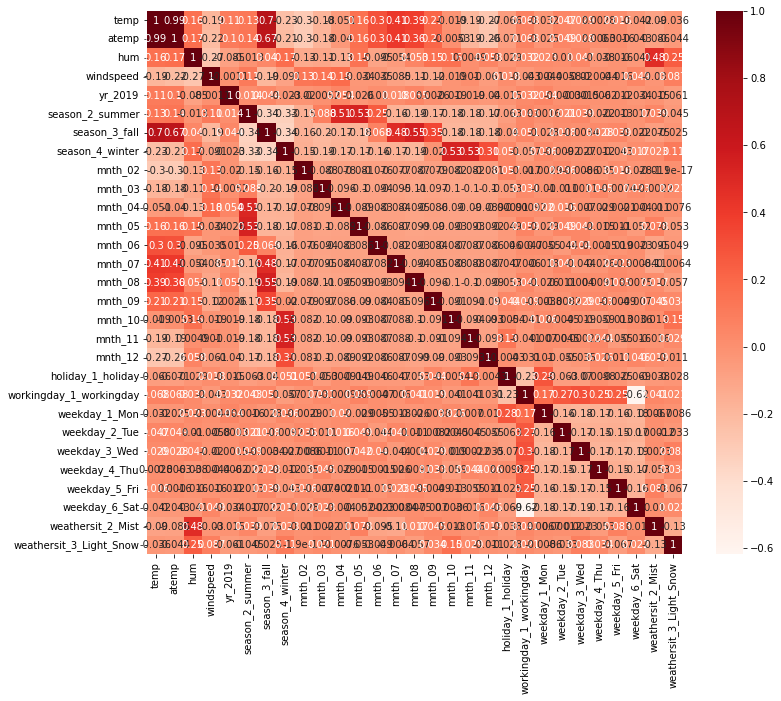

In [87]:
#calculate the correlation of train features
corr_train = df_train_features_scaled.corr()
plt.figure(figsize=(12,10))
sb.heatmap(corr_train,cmap='Reds',annot=True)

In [88]:
# Adding a constant variable 
import statsmodels.api as sm  
df_train_features_scaled = sm.add_constant(df_train_features_scaled)
lm = sm.OLS(df_train_target.reset_index(drop=True),df_train_features_scaled.reset_index(drop=True)).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          8.42e-181
Time:                        13:12:08   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = df_train_features_scaled.columns
vif['VIF'] = [variance_inflation_factor(df_train_features_scaled.values, i) for i in range(df_train_features_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\Users\thang.nguyen\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
25,weekday_4_Thu,inf
26,weekday_5_Fri,inf
24,weekday_3_Wed,inf
23,weekday_2_Tue,inf
22,weekday_1_Mon,inf
21,workingday_1_workingday,inf
20,holiday_1_holiday,inf
1,temp,67.12
2,atemp,56.09
7,season_3_fall,11.37


In [90]:
#drop 'atemp' col, because it has highest p-value in model summary and VIF = 56 > 5
df_train_features_scaled.drop(columns='atemp',inplace=True)
df_train_features_scaled

,const,temp,hum,windspeed,yr_2019,season_2_summer,season_3_fall,season_4_winter,mnth_02,mnth_03,mnth_04,mnth_05,mnth_06,mnth_07,mnth_08,mnth_09,mnth_10,mnth_11,mnth_12,holiday_1_holiday,workingday_1_workingday,weekday_1_Mon,weekday_2_Tue,weekday_3_Wed,weekday_4_Thu,weekday_5_Fri,weekday_6_Sat,weathersit_2_Mist,weathersit_3_Light_Snow
0,1.0,-0.121335,-0.514725,-0.117752,0.984435,-0.569803,-0.596978,1.736591,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,3.254368,-0.307279,-0.303442,-0.161731,0.691564,-0.421698,2.571369,-0.434524,-0.392232,-0.382188,-0.428129,-0.722764,-0.174078
1,1.0,1.231731,0.516433,-0.330615,0.984435,-0.569803,1.675103,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,3.475187,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,0.691564,-0.421698,2.571369,-0.434524,-0.392232,-0.382188,-0.428129,-0.722764,-0.174078
2,1.0,-0.420478,-0.069854,-0.385694,0.984435,-0.569803,-0.596978,-0.575841,-0.267261,3.03315,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,-1.445998,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,2.335743,1.383577,-0.174078
3,1.0,-1.294913,-1.045032,2.018143,0.984435,-0.569803,-0.596978,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,3.295522,-0.161731,-1.445998,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,-0.428129,-0.722764,-0.174078
4,1.0,-0.627580,-1.000840,-0.779889,0.984435,1.754993,-0.596978,-0.575841,-0.267261,-0.32969,3.427827,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,-1.445998,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,2.335743,1.383577,-0.174078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.0,1.273152,-0.305544,0.205320,0.984435,1.754993,-0.596978,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,3.524351,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,0.691564,2.371366,-0.388898,-0.434524,-0.392232,-0.382188,-0.428129,1.383577,-0.174078
506,1.0,1.448040,0.201190,-0.787759,0.984435,-0.569803,1.675103,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,3.067273,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,0.691564,-0.421698,-0.388898,-0.434524,2.549510,-0.382188,-0.428129,-0.722764,-0.174078
507,1.0,-1.483204,-1.471329,-1.234384,-1.015811,-0.569803,-0.596978,-0.575841,3.741657,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,-0.303442,-0.161731,0.691564,-0.421698,-0.388898,2.301368,-0.392232,-0.382188,-0.428129,-0.722764,-0.174078
508,1.0,-1.281106,-0.497048,0.654645,-1.015811,-0.569803,-0.596978,1.736591,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.307279,3.295522,-0.161731,-1.445998,-0.421698,-0.388898,-0.434524,-0.392232,-0.382188,2.335743,1.383577,-0.174078


In [91]:
#run model #2
df_train_features_scaled = sm.add_constant(df_train_features_scaled)
lm = sm.OLS(df_train_target.reset_index(drop=True),df_train_features_scaled.reset_index(drop=True)).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          8.74e-182
Time:                        13:12:09   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [92]:
# run VIF again #2
vif = pd.DataFrame()
vif['Features'] = df_train_features_scaled.columns
vif['VIF'] = [variance_inflation_factor(df_train_features_scaled.values, i) for i in range(df_train_features_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\Users\thang.nguyen\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,weekday_4_Thu,inf
25,weekday_5_Fri,inf
23,weekday_3_Wed,inf
22,weekday_2_Tue,inf
21,weekday_1_Mon,inf
20,workingday_1_workingday,inf
19,holiday_1_holiday,inf
6,season_3_fall,11.35
14,mnth_08,9.88
13,mnth_07,8.90


In [93]:
#from above results such as VIF and model summary, there are many insignification and dependent features, we need to remove them faster with RFE

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable
lm = LinearRegression()
lm.fit(df_train_features_scaled, df_train_target)

qty_features_selected = int(0.75*len(df_train_features_scaled.columns)) # reduce 25% total current features
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=qty_features_selected)             # running RFE
rfe = rfe.fit(df_train_features_scaled, df_train_target)
list(zip(df_train_features_scaled.columns,rfe.support_,rfe.ranking_))

[('const', False, 9),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr_2019', True, 1),
 ('season_2_summer', True, 1),
 ('season_3_fall', True, 1),
 ('season_4_winter', True, 1),
 ('mnth_02', True, 1),
 ('mnth_03', True, 1),
 ('mnth_04', True, 1),
 ('mnth_05', True, 1),
 ('mnth_06', True, 1),
 ('mnth_07', True, 1),
 ('mnth_08', True, 1),
 ('mnth_09', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 2),
 ('mnth_12', False, 3),
 ('holiday_1_holiday', True, 1),
 ('workingday_1_workingday', True, 1),
 ('weekday_1_Mon', False, 8),
 ('weekday_2_Tue', False, 7),
 ('weekday_3_Wed', False, 5),
 ('weekday_4_Thu', False, 6),
 ('weekday_5_Fri', False, 4),
 ('weekday_6_Sat', True, 1),
 ('weathersit_2_Mist', True, 1),
 ('weathersit_3_Light_Snow', True, 1)]

In [94]:
#selected features
df_train_features_scaled_RFE1 = df_train_features_scaled.loc[:,rfe.support_]
df_train_features_scaled_RFE1

,temp,hum,windspeed,yr_2019,season_2_summer,season_3_fall,season_4_winter,mnth_02,mnth_03,mnth_04,mnth_05,mnth_06,mnth_07,mnth_08,mnth_09,mnth_10,holiday_1_holiday,workingday_1_workingday,weekday_6_Sat,weathersit_2_Mist,weathersit_3_Light_Snow
0,-0.121335,-0.514725,-0.117752,0.984435,-0.569803,-0.596978,1.736591,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,3.254368,-0.161731,0.691564,-0.428129,-0.722764,-0.174078
1,1.231731,0.516433,-0.330615,0.984435,-0.569803,1.675103,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,3.475187,-0.326023,-0.295669,-0.307279,-0.161731,0.691564,-0.428129,-0.722764,-0.174078
2,-0.420478,-0.069854,-0.385694,0.984435,-0.569803,-0.596978,-0.575841,-0.267261,3.03315,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.161731,-1.445998,2.335743,1.383577,-0.174078
3,-1.294913,-1.045032,2.018143,0.984435,-0.569803,-0.596978,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.161731,-1.445998,-0.428129,-0.722764,-0.174078
4,-0.627580,-1.000840,-0.779889,0.984435,1.754993,-0.596978,-0.575841,-0.267261,-0.32969,3.427827,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.161731,-1.445998,2.335743,1.383577,-0.174078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.273152,-0.305544,0.205320,0.984435,1.754993,-0.596978,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,3.524351,-0.287754,-0.326023,-0.295669,-0.307279,-0.161731,0.691564,-0.428129,1.383577,-0.174078
506,1.448040,0.201190,-0.787759,0.984435,-0.569803,1.675103,-0.575841,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,3.067273,-0.295669,-0.307279,-0.161731,0.691564,-0.428129,-0.722764,-0.174078
507,-1.483204,-1.471329,-1.234384,-1.015811,-0.569803,-0.596978,-0.575841,3.741657,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.161731,0.691564,-0.428129,-0.722764,-0.174078
508,-1.281106,-0.497048,0.654645,-1.015811,-0.569803,-0.596978,1.736591,-0.267261,-0.32969,-0.291730,-0.303442,-0.283740,-0.287754,-0.326023,-0.295669,-0.307279,-0.161731,-1.445998,2.335743,1.383577,-0.174078


In [95]:
#run model #3
df_train_features_scaled_RFE1 = sm.add_constant(df_train_features_scaled_RFE1)
lm = sm.OLS(df_train_target.reset_index(drop=True),df_train_features_scaled_RFE1.reset_index(drop=True)).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.44e-187
Time:                        13:12:09   Log-Likelihood:                -4099.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     488   BIC:                             8336.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [96]:
# run VIF again #3
vif = pd.DataFrame()
vif['Features'] = df_train_features_scaled_RFE1.columns
vif['VIF'] = [variance_inflation_factor(df_train_features_scaled_RFE1.values, i) for i in range(df_train_features_scaled_RFE1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_3_fall,9.73
14,mnth_08,7.01
1,temp,6.80
13,mnth_07,6.42
5,season_2_summer,6.36
11,mnth_05,5.39
12,mnth_06,5.25
10,mnth_04,4.35
15,mnth_09,4.08
7,season_4_winter,3.10


In [97]:
# Running RFE #2
lm = LinearRegression()
lm.fit(df_train_features_scaled_RFE1, df_train_target)

qty_features_selected = int(0.75*len(df_train_features_scaled_RFE1.columns)) # reduce 25% total current features
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=qty_features_selected)             # running RFE
rfe = rfe.fit(df_train_features_scaled_RFE1, df_train_target)
#selected features
df_train_features_scaled_RFE2 = df_train_features_scaled_RFE1.loc[:,rfe.support_]
df_train_features_scaled_RFE2

,temp,hum,windspeed,yr_2019,season_2_summer,season_3_fall,season_4_winter,mnth_03,mnth_05,mnth_08,mnth_09,mnth_10,workingday_1_workingday,weekday_6_Sat,weathersit_2_Mist,weathersit_3_Light_Snow
0,-0.121335,-0.514725,-0.117752,0.984435,-0.569803,-0.596978,1.736591,-0.32969,-0.303442,-0.326023,-0.295669,3.254368,0.691564,-0.428129,-0.722764,-0.174078
1,1.231731,0.516433,-0.330615,0.984435,-0.569803,1.675103,-0.575841,-0.32969,-0.303442,-0.326023,-0.295669,-0.307279,0.691564,-0.428129,-0.722764,-0.174078
2,-0.420478,-0.069854,-0.385694,0.984435,-0.569803,-0.596978,-0.575841,3.03315,-0.303442,-0.326023,-0.295669,-0.307279,-1.445998,2.335743,1.383577,-0.174078
3,-1.294913,-1.045032,2.018143,0.984435,-0.569803,-0.596978,-0.575841,-0.32969,-0.303442,-0.326023,-0.295669,-0.307279,-1.445998,-0.428129,-0.722764,-0.174078
4,-0.627580,-1.000840,-0.779889,0.984435,1.754993,-0.596978,-0.575841,-0.32969,-0.303442,-0.326023,-0.295669,-0.307279,-1.445998,2.335743,1.383577,-0.174078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.273152,-0.305544,0.205320,0.984435,1.754993,-0.596978,-0.575841,-0.32969,-0.303442,-0.326023,-0.295669,-0.307279,0.691564,-0.428129,1.383577,-0.174078
506,1.448040,0.201190,-0.787759,0.984435,-0.569803,1.675103,-0.575841,-0.32969,-0.303442,3.067273,-0.295669,-0.307279,0.691564,-0.428129,-0.722764,-0.174078
507,-1.483204,-1.471329,-1.234384,-1.015811,-0.569803,-0.596978,-0.575841,-0.32969,-0.303442,-0.326023,-0.295669,-0.307279,0.691564,-0.428129,-0.722764,-0.174078
508,-1.281106,-0.497048,0.654645,-1.015811,-0.569803,-0.596978,1.736591,-0.32969,-0.303442,-0.326023,-0.295669,-0.307279,-1.445998,2.335743,1.383577,-0.174078


In [98]:
#run model #4
df_train_features_scaled_RFE2 = sm.add_constant(df_train_features_scaled_RFE2)
lm = sm.OLS(df_train_target.reset_index(drop=True),df_train_features_scaled_RFE2.reset_index(drop=True)).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.94e-191
Time:                        13:12:09   Log-Likelihood:                -4104.3
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     493   BIC:                             8315.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [99]:
# run VIF again #4
vif = pd.DataFrame()
vif['Features'] = df_train_features_scaled_RFE2.columns
vif['VIF'] = [variance_inflation_factor(df_train_features_scaled_RFE2.values, i) for i in range(df_train_features_scaled_RFE2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_3_fall,6.48
1,temp,3.84
5,season_2_summer,2.81
7,season_4_winter,2.38
2,hum,1.95
10,mnth_08,1.68
13,workingday_1_workingday,1.66
14,weekday_6_Sat,1.65
15,weathersit_2_Mist,1.58
9,mnth_05,1.57


In [100]:
#drop season_3_fall which has VIF = 6.48 > 5
df_train_features_scaled_RFE2.drop(columns='season_3_fall',inplace=True)
# run VIF again #5
vif = pd.DataFrame()
vif['Features'] = df_train_features_scaled_RFE2.columns
vif['VIF'] = [variance_inflation_factor(df_train_features_scaled_RFE2.values, i) for i in range(df_train_features_scaled_RFE2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,1.92
6,season_4_winter,1.79
5,season_2_summer,1.74
12,workingday_1_workingday,1.66
13,weekday_6_Sat,1.65
1,temp,1.63
14,weathersit_2_Mist,1.57
8,mnth_05,1.52
11,mnth_10,1.49
9,mnth_08,1.48


In [101]:
#run model #5
df_train_features_scaled_RFE2 = sm.add_constant(df_train_features_scaled_RFE2)
lm = sm.OLS(df_train_target.reset_index(drop=True),df_train_features_scaled_RFE2.reset_index(drop=True)).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.07e-191
Time:                        13:12:09   Log-Likelihood:                -4106.5
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     494   BIC:                             8313.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [102]:
#drop the mnth_05 because its p-value = 0.155 > 0.05
df_train_features_scaled_RFE2.drop(columns='mnth_05',inplace=True)       
# run VIF again #6
vif = pd.DataFrame()
vif['Features'] = df_train_features_scaled_RFE2.columns
vif['VIF'] = [variance_inflation_factor(df_train_features_scaled_RFE2.values, i) for i in range(df_train_features_scaled_RFE2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif        

,Features,VIF
2,hum,1.88
6,season_4_winter,1.79
11,workingday_1_workingday,1.66
12,weekday_6_Sat,1.65
1,temp,1.62
13,weathersit_2_Mist,1.57
10,mnth_10,1.49
8,mnth_08,1.47
5,season_2_summer,1.38
9,mnth_09,1.25


In [103]:
#run model #6
df_train_features_scaled_RFE2 = sm.add_constant(df_train_features_scaled_RFE2)
lm = sm.OLS(df_train_target.reset_index(drop=True),df_train_features_scaled_RFE2.reset_index(drop=True)).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.80e-192
Time:                        13:12:09   Log-Likelihood:                -4107.5
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [104]:
#drop mnth_03 because its p-value = 0.112 > 0.05
df_train_features_scaled_RFE2.drop(columns='mnth_03',inplace=True)       
# run VIF again #6
vif = pd.DataFrame()
vif['Features'] = df_train_features_scaled_RFE2.columns
vif['VIF'] = [variance_inflation_factor(df_train_features_scaled_RFE2.values, i) for i in range(df_train_features_scaled_RFE2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif        

,Features,VIF
2,hum,1.88
6,season_4_winter,1.72
10,workingday_1_workingday,1.65
11,weekday_6_Sat,1.65
1,temp,1.59
12,weathersit_2_Mist,1.57
9,mnth_10,1.49
7,mnth_08,1.46
5,season_2_summer,1.38
13,weathersit_3_Light_Snow,1.25


In [105]:
#run model #7
df_train_features_scaled_RFE2 = sm.add_constant(df_train_features_scaled_RFE2)
lm = sm.OLS(df_train_target.reset_index(drop=True),df_train_features_scaled_RFE2.reset_index(drop=True)).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.86e-192
Time:                        13:12:10   Log-Likelihood:                -4108.8
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     496   BIC:                             8305.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

# (IV) Residual Analysis of the train data

c:\Users\thang.nguyen\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


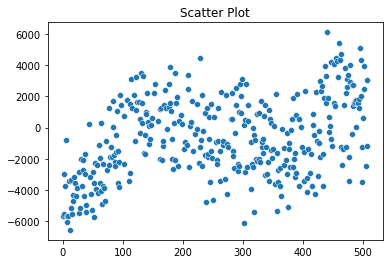

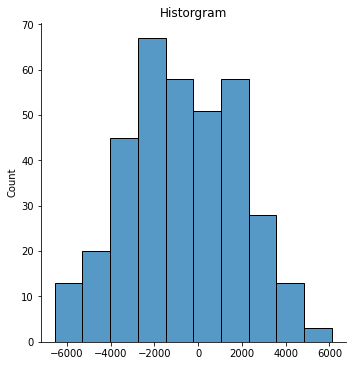

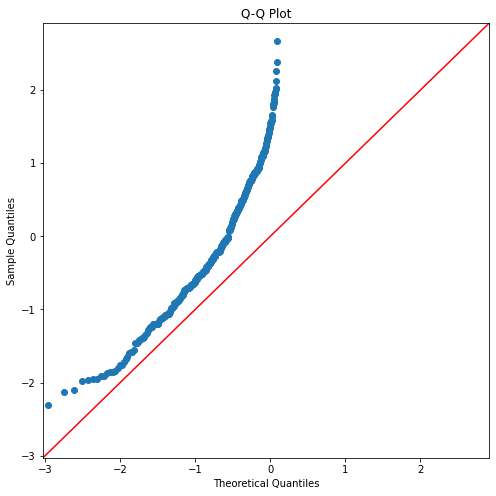

In [106]:
df_train_target_predicted = lm.predict(df_train_features_scaled_RFE2)
import pylab as py 
import scipy.stats as stats
# Plot the histogram of the error terms
sb.scatterplot((df_train_target - df_train_target_predicted))
plt.title("Scatter Plot")
sb.displot((df_train_target - df_train_target_predicted), bins = 10)
plt.title("Historgram")

# Create Q-Q plot
fig, ax = plt.subplots(figsize=(8, 8))
data = df_train_target - df_train_target_predicted
standardized_data = (data - np.mean(data)) / np.std(data)
sm.qqplot(standardized_data, line='45', ax=ax, marker='o', color='blue')
ax.set_title('Q-Q Plot')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
plt.show()


### Summary on validating the model's errors terms assumptions:
- Errors are scattered, independent and not-linear correlated or not having any special patterns in the scatter plot
- Errors are approximately normally distributed fairly - centered zero in the histogram and Q-Q plot shows it is not strongly normally distributed but I accept to assume that Errors are normally distributed!
- Therefore, the model is quite good to pass the validation and we can move ahead to predict the test data

# (V) Predict test data and evaluate the model

final_selected_col:  ['temp', 'hum', 'windspeed', 'yr_2019', 'season_2_summer', 'season_4_winter', 'mnth_08', 'mnth_09', 'mnth_10', 'workingday_1_workingday', 'weekday_6_Sat', 'weathersit_2_Mist', 'weathersit_3_Light_Snow']
R2 score - train =  0.8468299054958596
MAPE score - train =  0.4562296901746468
R2 score - test =  0.81368080508983
MAPE score - test =  0.1934869763479268
Corr_test:  0.9028652787345921


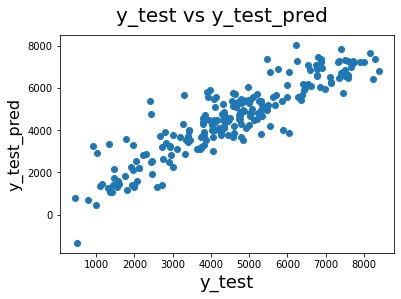

In [107]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
final_selected_col = [col for col in df_train_features_scaled_RFE2.columns if col in df_test_features_scaled.columns ]
print('final_selected_col: ',final_selected_col)

df_test_features_scaled=sm.add_constant(df_test_features_scaled)
df_test_target_predicted = lm.predict(df_test_features_scaled[df_train_features_scaled_RFE2.columns])
print('R2 score - train = ',r2_score(df_train_target,df_train_target_predicted))
print('MAPE score - train = ',mean_absolute_percentage_error(df_train_target,df_train_target_predicted))
print('R2 score - test = ',r2_score(df_test_target,df_test_target_predicted))
print('MAPE score - test = ',mean_absolute_percentage_error(df_test_target,df_test_target_predicted))

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(df_test_target,df_test_target_predicted)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)  # Y-label
corr= np.corrcoef([df_test_target,df_test_target_predicted])
print('Corr_test: ',corr[0,1])

### Summary on model evaluation on the test data:
- R2 score on train data is 0.847 and on test data is 0.814 respectively, and MAPE of test data is even better than train data, which shows that we are having a good performance model
- Test data actual and predicted are strongly correlated (+0.90) as shown on the scatter chart visually